# Automobile Data Analysis

Here we'll be using an Automobile Dataset obtained from Kaggle and analyse the distribution based on the detailing of the Model.
We have downloaded the CSV manually and uploaded it via Jupyter's GUI for accesss. 

In [1]:
project_name = "Automobile Data Analysis" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Data Preparation and Cleaning

In this section we'll be performing cleaning of the data which involves removing the blank columns, cutting and slicing of the datasets and preparing our data for further analysis without any obstruction.

In [5]:
import pandas as pd

In [6]:
!pip install numpy pandas matplotlib seaborn --upgrade --quiet

In [7]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### We are going to see the following, as we move further:

1) CSV Reading

2) Finding the number of Rows and Columns in the dataset

3) Extracting the list of columns

4) Removing certain columns that might not be needed

5) Changing the names of few of the columns to provide ease in data analysis

In [9]:
auto_df = pd.read_csv(r'Automobile_data.csv')
auto_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [10]:
auto_df.shape

(205, 26)

In [11]:
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [12]:
auto_df = auto_df[auto_df['normalized-losses'] != '?']
auto_df = auto_df[auto_df['bore'] != '?']
auto_df = auto_df[auto_df['stroke'] != '?']
auto_df = auto_df[auto_df['horsepower'] != '?']
auto_df = auto_df[auto_df['peak-rpm'] != '?']
auto_df = auto_df[auto_df['price'] != '?']
auto_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [13]:
auto_df.drop(columns=['aspiration','drive-wheels','bore','stroke'], inplace=True)

In [14]:
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'num-of-doors',
       'body-style', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [15]:
auto_df.shape

(160, 22)

In [16]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 3 to 204
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    object 
 2   make               160 non-null    object 
 3   fuel-type          160 non-null    object 
 4   num-of-doors       160 non-null    object 
 5   body-style         160 non-null    object 
 6   engine-location    160 non-null    object 
 7   wheel-base         160 non-null    float64
 8   length             160 non-null    float64
 9   width              160 non-null    float64
 10  height             160 non-null    float64
 11  curb-weight        160 non-null    int64  
 12  engine-type        160 non-null    object 
 13  num-of-cylinders   160 non-null    object 
 14  engine-size        160 non-null    int64  
 15  fuel-system        160 non-null    object 
 16  compression-ratio  160 non

In [17]:
auto_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.737500,98.235625,172.319375,65.596250,53.878750,2459.450000,119.093750,10.145125,26.506250,32.068750
std,1.189511,5.163763,11.548860,1.946999,2.276608,480.897834,30.411186,3.882507,6.081208,6.440948
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,15.000000,18.000000
25%,0.000000,94.500000,165.525000,64.000000,52.000000,2073.250000,97.000000,8.700000,23.000000,28.000000
50%,1.000000,96.900000,172.200000,65.400000,54.100000,2338.500000,110.000000,9.000000,26.000000,32.000000
75%,2.000000,100.600000,177.800000,66.500000,55.500000,2808.750000,134.500000,9.400000,31.000000,37.000000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,23.000000,49.000000,54.000000


In [18]:
auto_df.make.unique()

array(['audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'jaguar', 'mazda',
       'mercedes-benz', 'mitsubishi', 'nissan', 'peugot', 'plymouth',
       'porsche', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [19]:
auto_df = auto_df.rename(columns = {'body-style': 'bodystyle'}, inplace = False)

In [20]:
auto_df.bodystyle.unique()

array(['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'],
      dtype=object)

In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanya-dassani/automobile-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sanya-dassani/automobile-data-analysis


'https://jovian.ml/sanya-dassani/automobile-data-analysis'

## Exploratory Analysis and Visualization

This section is going to include analysis using a range of functions like finding count, maximum value, minimum value, grouping, type casting and based on those functional values we'll be plotting various graphs to see the visual representation of the data.

In [23]:
auto_df = auto_df.rename(columns = {'engine-size': 'enginesize'}, inplace = False)

In [24]:
#Using the max() function to find the maximum engine size

auto_df.enginesize.max()

258

In [25]:
#Finding the name of the car that has the maximum engine size.

makename = auto_df.make[auto_df['enginesize'].idxmax()]
print("{} has the maximum Engine size.".format(makename))

jaguar has the maximum Engine size.


In [26]:
#Grouping by the column "make" and then counting the entries against each category
auto_df.groupby('make').count()

,symboling,normalized-losses,fuel-type,num-of-doors,bodystyle,engine-location,wheel-base,length,width,height,...,engine-type,num-of-cylinders,enginesize,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
make,,,,,,,,,,,,,,,,,,,,,
audi,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
bmw,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
jaguar,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mazda,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
mercedes-benz,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
mitsubishi,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [27]:
#Creation of a new data subset grouped by the "Make" of the Car.

make_df = auto_df.groupby('make')[['bodystyle']].count()
make_df

,bodystyle
make,
audi,4
bmw,4
chevrolet,3
dodge,9
honda,13
jaguar,1
mazda,11
mercedes-benz,5
mitsubishi,10


In [28]:
#This fucntion is going to return the value in the make column against the highest number in the "bodystyle" column
make_df.bodystyle.idxmax()

'toyota'

In [29]:
#Lowest value in the "length" column

auto_df.length.min()

141.1

In [30]:
#Information about Chevrolet using the idxmin() function

minlen = auto_df.make[auto_df['length'].idxmin()]
bod = auto_df.bodystyle[auto_df['length'].idxmin()]
print("{} car is a {} and has the minumum length.".format(minlen, bod) )

chevrolet car is a hatchback and has the minumum length.


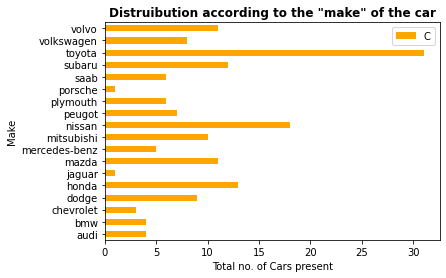

In [31]:
#Using the newly created data subset above, we are going to plot a horizontal bar graph

make_df.plot(kind='barh',color='Orange')
plt.title('Distruibution according to the "make" of the car',fontweight=600)
plt.ylabel('Make')
plt.xlabel('Total no. of Cars present')
plt.yticks(rotation=0,fontsize=10)
plt.legend("Cars")
plt.show()

<AxesSubplot:title={'center':'Distruibution according to the "make" of the car in the form of a Heat Map'}, ylabel='make'>

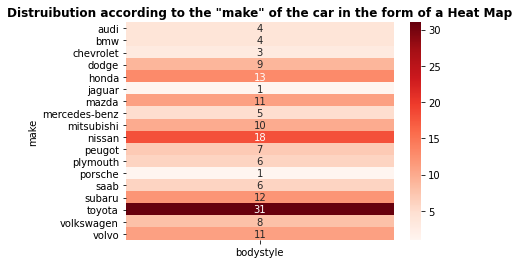

In [32]:
# Using the newly created data subset above, we are going to plot the same graph in the form of a Heatmap representation

plt.title('Distruibution according to the "make" of the car in the form of a Heat Map',fontweight=600)
sns.heatmap(make_df, annot=True, cmap='Reds')

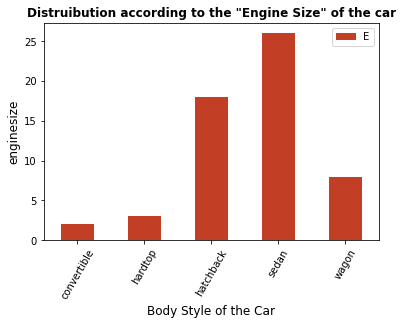

In [33]:
# Plotting of the "bodystyle" bsed on the "enginesize"

auto_df.groupby('bodystyle')['enginesize'].nunique().plot(kind='bar', color="#C23E25")
plt.title('Distruibution according to the "Engine Size" of the car',fontweight=600)
plt.ylabel('enginesize',fontsize=12)
plt.xlabel('Body Style of the Car',fontsize=12)
plt.xticks(rotation=60,fontsize=10)
plt.legend("Engine Size")
plt.show()

Text(0.5, 0, 'Body Style of the Car')

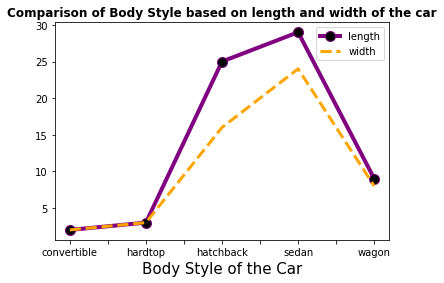

In [34]:
# Comparison between length and width based on the "bodystyle"

ax = plt.gca()
auto_df.groupby('bodystyle')['length'].nunique().plot(kind='line', color="purple", marker='o', markerfacecolor='black', markersize=10, linewidth=4, legend="length", ax=ax)
auto_df.groupby('bodystyle')['width'].nunique().plot(kind='line', color='orange', linewidth=3, linestyle='dashed',legend="width", ax=ax)
plt.title('Comparison of Body Style based on length and width of the car',fontweight=600)
plt.xlabel('Body Style of the Car', fontsize=15)


In [35]:
# Renaming some columns for easy usage

auto_df = auto_df.rename(columns = {'engine-location' : 'enginelocation', 'city-mpg' : 'citympg', 'highway-mpg' : 'highwaympg'})

Text(0.5, 0, 'Body Style of the Car')

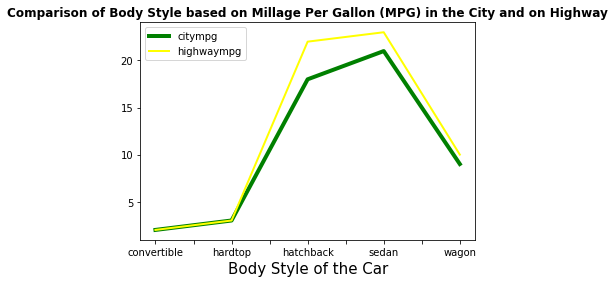

In [36]:
# Comparison between citympg and highwaympg based on "bodystyle"

ax = plt.gca()
auto_df.groupby('bodystyle')['citympg'].nunique().plot(kind='line', color="green",linewidth =4, legend="length", ax=ax)
auto_df.groupby('bodystyle')['highwaympg'].nunique().plot(kind='line', color='yellow',linewidth =2, legend="width", ax=ax)
plt.title('Comparison of Body Style based on Millage Per Gallon (MPG) in the City and on Highway',fontweight=600)
plt.xlabel('Body Style of the Car', fontsize=15)

In [37]:
# Maximum price of the car

auto_df.price.unique().astype(int).max()

35056

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'audi'),
  Text(1, 0, 'bmw'),
  Text(2, 0, 'chevrolet'),
  Text(3, 0, 'dodge'),
  Text(4, 0, 'honda'),
  Text(5, 0, 'jaguar'),
  Text(6, 0, 'mazda'),
  Text(7, 0, 'mercedes-benz'),
  Text(8, 0, 'mitsubishi'),
  Text(9, 0, 'nissan'),
  Text(10, 0, 'peugot'),
  Text(11, 0, 'plymouth'),
  Text(12, 0, 'porsche'),
  Text(13, 0, 'saab'),
  Text(14, 0, 'subaru'),
  Text(15, 0, 'toyota'),
  Text(16, 0, 'volkswagen'),
  Text(17, 0, 'volvo')])

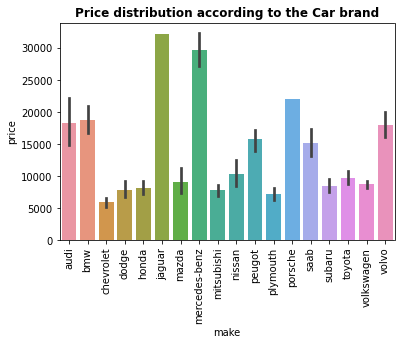

In [38]:
# "make" plotted according to the "price" of each category

sns.barplot(x='make', y=auto_df.price.astype(int), data=auto_df)
plt.title('Price distribution according to the Car brand',fontweight=600)
plt.xticks(rotation=90,fontsize=10)

Text(0.5, 1.0, 'Distribution based on fuel type')

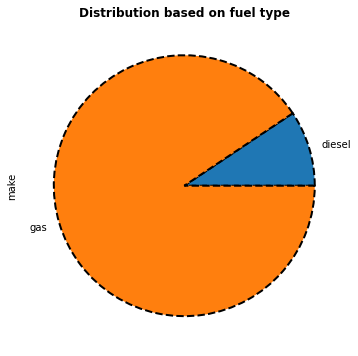

In [39]:
# Types of "Gas" and "Diesel" cars - distrbuted

df = auto_df.groupby('fuel-type')['make'].count()
df.plot.pie(subplots=True, figsize=(12, 6), wedgeprops={"edgecolor":"0",'linewidth': 2,
                    'linestyle': 'dashed', 'antialiased': True})
plt.title('Distribution based on fuel type',fontweight=600)

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanya-dassani/automobile-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sanya-dassani/automobile-data-analysis


'https://jovian.ml/sanya-dassani/automobile-data-analysis'

## Asking and Answering Questions

In [42]:
auto_df = auto_df.rename(columns = {"peak-rpm" : "peakrpm"}, inplace=False)

In [43]:
#Q1 Mean Peak RPM value?

avg = int(auto_df.peakrpm.unique().astype(int).mean())
print("Average peak RPM of the cars is {}".format(avg))

Average peak RPM of the cars is 5052


In [44]:
#Q2 Distribution of cars that have that have four doors to the ones that have only two doors 

auto_df = auto_df.rename(columns = {"num-of-doors" : "doors"}, inplace=False)
auto_df = auto_df[auto_df['doors'] != '?']

Text(0.5, 1.0, 'Distribution based on no. of Doors')

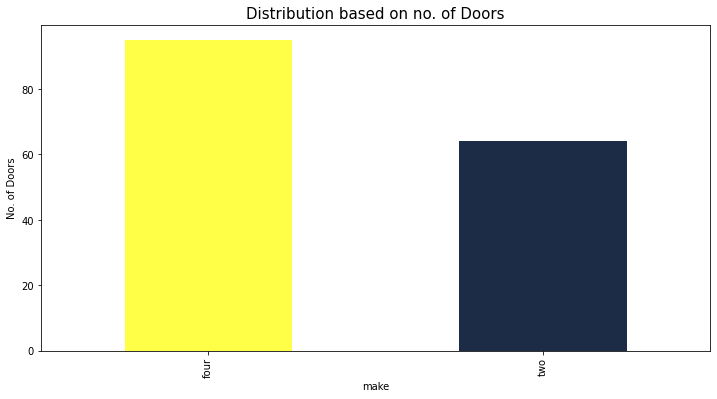

In [45]:
df1 = auto_df.groupby('doors')['make'].count()
df1.plot.bar(subplots=True, figsize=(12, 6), color=['#FFFF48','#1C2C46'])
plt.xlabel("make")
plt.ylabel("No. of Doors")
plt.title("Distribution based on no. of Doors", fontsize=15)

In [46]:
#Q3 Percentage of cars that have 2 doors?

perc = ((auto_df['doors'] == 'two').sum()/(auto_df['doors']).count())*100
print('{}% of the cars have two doors'.format(int(perc)))

40% of the cars have two doors


Text(0.5, 1.0, 'Distribution of cars based on body style')

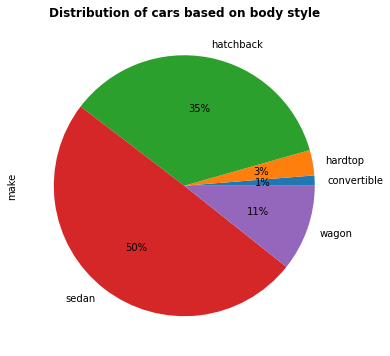

In [47]:
#Q4 Distribution of cars based on body style

df = auto_df.groupby('bodystyle')['make'].count()
df.plot.pie(subplots=True, figsize=(12, 6), autopct='%1.0f%%')
plt.title('Distribution of cars based on body style',fontweight=600)

In [48]:
auto_df = auto_df.rename(columns = {"num-of-cylinders" : "cylinders"}, inplace=False)

In [49]:
#Q5 How many cycliners do maximum Cars have?

cyl = auto_df.cylinders.mode().max()
print("Maximum cars have {} cylinders".format(cyl))

Maximum cars have four cylinders


In [50]:
import jovian

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanya-dassani/automobile-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sanya-dassani/automobile-data-analysis


'https://jovian.ml/sanya-dassani/automobile-data-analysis'

## Inferences and Conclusion
The analysis on Automobile_data.csv can be summarised as below:

We first take the raw excel and clean the data to provide the ease in evaluation.
Renaming certain columns, removing some of them, removing the rows with invalid entries, creating a sub-set out of the existing set. 

Now using the manipulated data we can extract values using the index posistion of the column, maximum and minimun values, comparison between two columns, types of vehicles based on the fuel used, distribution based on engine size, body style, make of the vehicle. 

Further we used the dataset to visualize the types of distributions extracted in part-2. Several types of graphs plotted to easily see the stats based on the data given to us. 

## References

Check out the various resource used in this project:

ZerotoPandas Tutorial by JovianML- Data Analysis with Python: Zero to Pandas

Kaggle for Dataset reference: https://www.kaggle.com/toramky/automobile-dataset

Numpy Documentation: https://numpy.org/devdocs/user/quickstart.html

User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanya-dassani/automobile-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sanya-dassani/automobile-data-analysis


'https://jovian.ml/sanya-dassani/automobile-data-analysis'

In [55]:
jovian.commit(files=['Automobile_data.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanya-dassani/automobile-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/sanya-dassani/automobile-data-analysis


'https://jovian.ml/sanya-dassani/automobile-data-analysis'